# Southern Ocean ONE STEP eddy tracking

The objective of this script is to track the eddies in the Southern Ocean.


In [1]:
import time
## dd/mm/yyyy format
print('Execuded the :', time.strftime("%d/%m/%Y"))

Execuded the : 29/08/2017


In [2]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

In [3]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

In [4]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.output/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

(<matplotlib.figure.Figure at 0x7f08f1267e48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f08f1277860>)

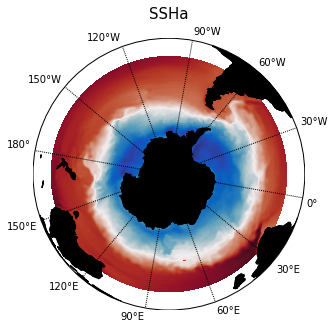

In [5]:
basemap_mplot(lon,lat,ssh_mean,title="SSHa",scale='Lin',cmap=cm.cm.balance\
              ,vmin='',vmax='',xan=1,yan=1,figsize=(5,5),fontsize=15)

In [6]:
###This mask is necessary to remask each time step, 
#It's not necesary if your mask is good in all the time steps
mask=ma.getmask(eta[0,:,:])

## Analysis in just one level  

To extract or analyse the data in just one time step use the following two examples:

* **Possitive eddy tracking**
* **Negative eddy tracking**


In [7]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
areamap=array([[0,len(lon)],[0,len(lat)]])
#areamap=array([[0,200],[600,len(lat)]])

#### Possitive eddy tracking

In [8]:
eddytd=analyseddyt(eta,lon,lat,level=10,t0=0,t1=1,tstep=1,data_meant=ssh_mean,\
                   areamap=areamap,mask='',destdir='',okparm='',diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 80 s  

#### Negative eddy tracking

In [9]:
eddytdn=analyseddyt(eta,lon,lat,level=-10,t0=0,t1=1,tstep=1,data_meant=ssh_mean,\
                   areamap=areamap,mask='',destdir='',okparm='',diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 56 s  

### Removing eddies from eddy field or any other variable.

In [10]:
# SSHa Field used to extract eddies
ssha=eta[0,:,:]-ssh_mean

In [11]:
#This threshold will let you grow the domine around the eddy contour.
threshold=1
# Function that removes the eddies
## Positive remotion
eddysplot=exeddy(eddytd,lat,lon,ssha,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


In [12]:
## Negative remotion
eddysplotn=exeddy(eddytdn,lat,lon,ssha,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


### Ploting removed data in beautiful maps

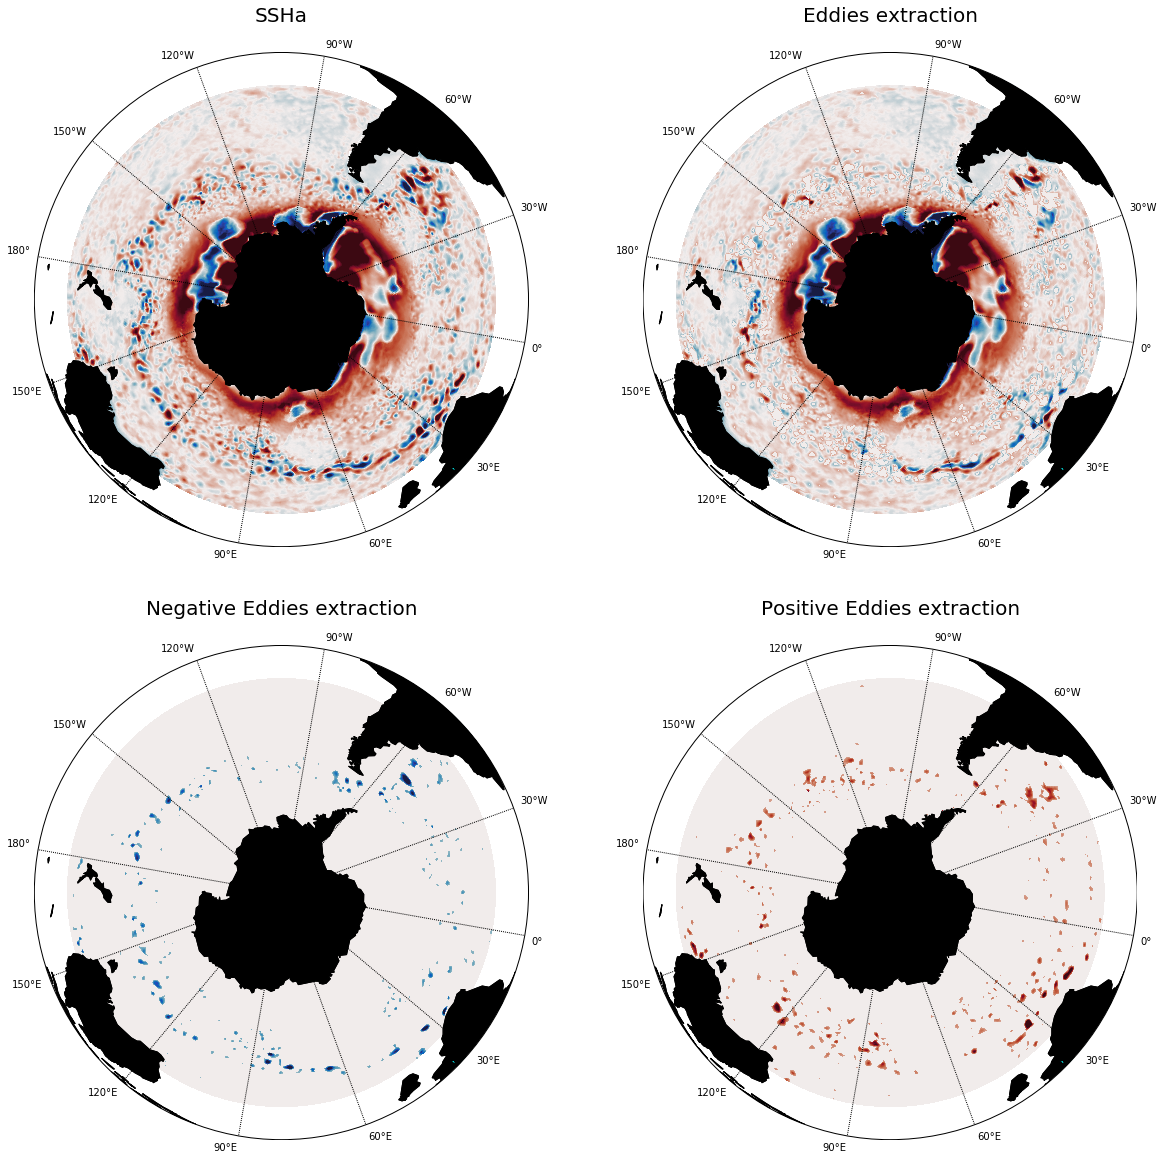

In [13]:
basemap_mplot(lon,lat,[ssha,ssha-eddysplot-eddysplotn,eddysplotn,eddysplot]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction",\
                       "Positive Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=2,yan=2,figsize=(20,20),fontsize=20);

# Analysis of eddies scanning in d$\eta$

In [14]:
eddytd=analyseddyzt(eta,lon,lat,0,1,1,40,10,1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 929 s  

In [15]:
threshold=1
eddysplot=exeddy(eddytd,lat,lon,ssha,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


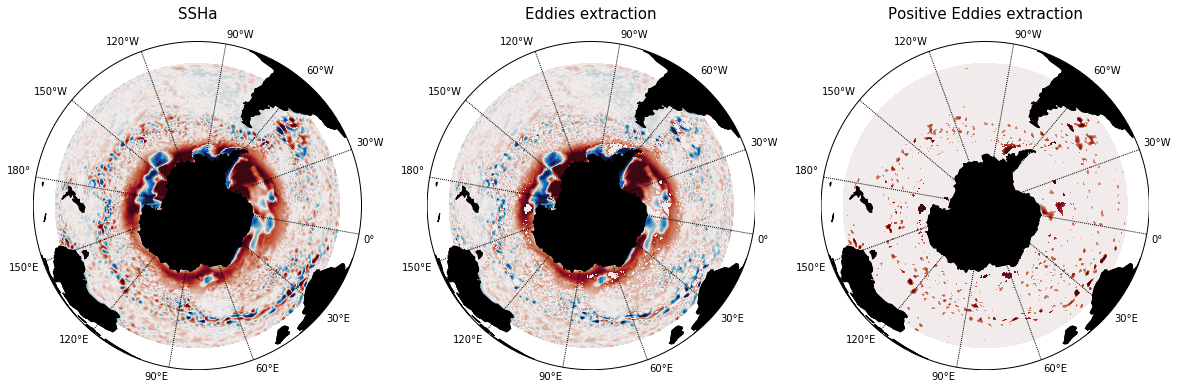

In [16]:
basemap_mplot(lon,lat,[ssha,ssha-eddysplot,eddysplot]\
              ,title=["SSHa","Eddies extraction",
                       "Positive Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=1,yan=3,figsize=(20,20),fontsize=15);

In [17]:
eddytdn=analyseddyzt(eta,lon,lat,0,1,1,-10,-40,1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 726 s  

In [18]:
threshold=1
eddysplotn=exeddy(eddytdn,lat,lon,ssha,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


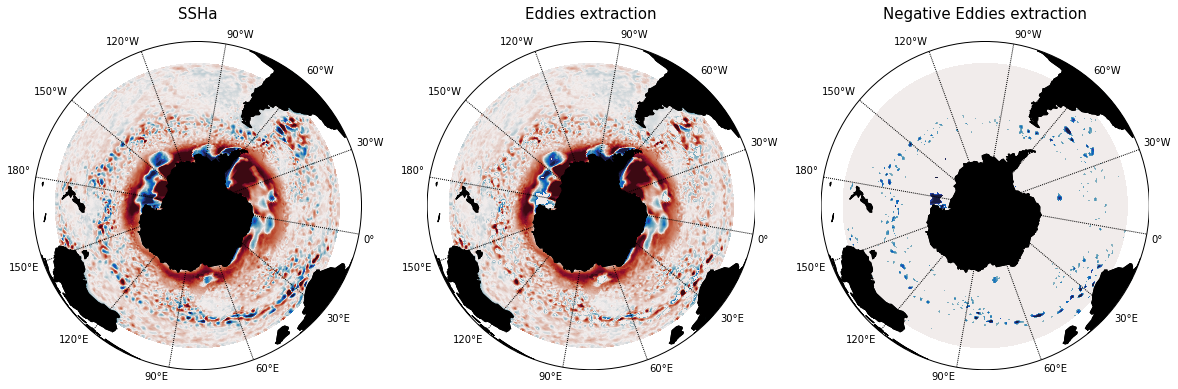

In [19]:
basemap_mplot(lon,lat,[ssha,ssha-eddysplotn,eddysplotn]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=1,yan=3,figsize=(20,20),fontsize=15);

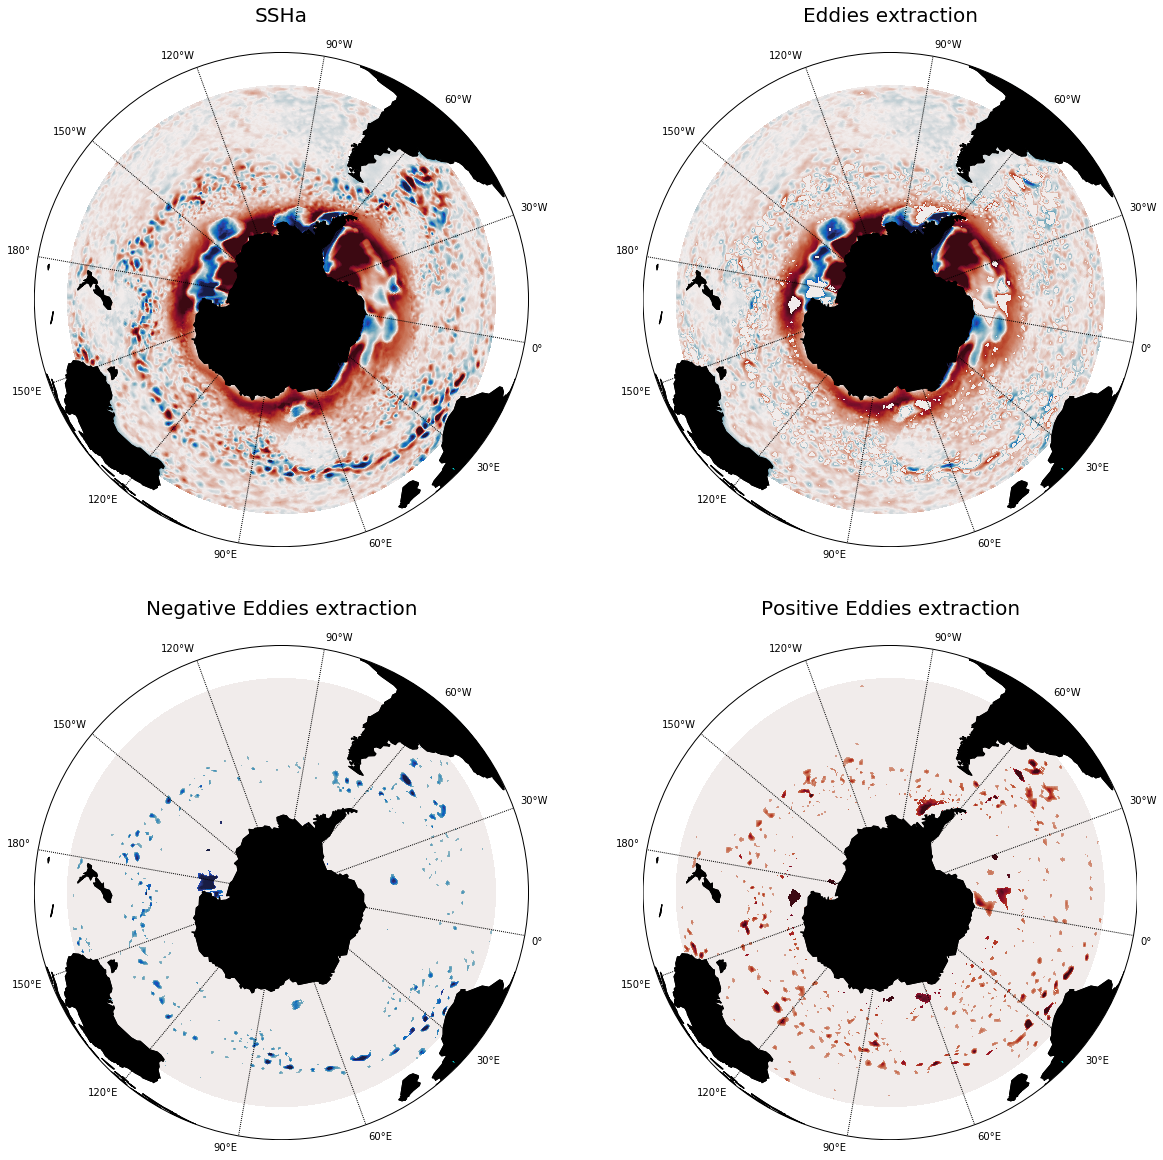

In [20]:
basemap_mplot(lon,lat,[ssha,ssha-eddysplot-eddysplotn,eddysplotn,eddysplot]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction",\
                       "Positive Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=2,yan=2,figsize=(20,20),fontsize=20);
plt.savefig('../output/eddy_removal.jpg', bbox_inches='tight')

# Testing Average of January in 10 years

In [21]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.output/meanssh_jan_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean_january'][:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]
#pcolormesh(ssh_mean)

In [22]:
eddytd=analyseddyzt(eta,lon,lat,0,1,1,40,1,1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 1972 s  

In [ ]:
ssha=eta[0,:,:]-ssh_mean
threshold=1
eddysplot=exeddy(eddytd,lat,lon,ssha,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,1,1,-1,-40,1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 2165 s  

In [ ]:
threshold=1
eddysplotn=exeddy(eddytdn,lat,lon,ssha,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


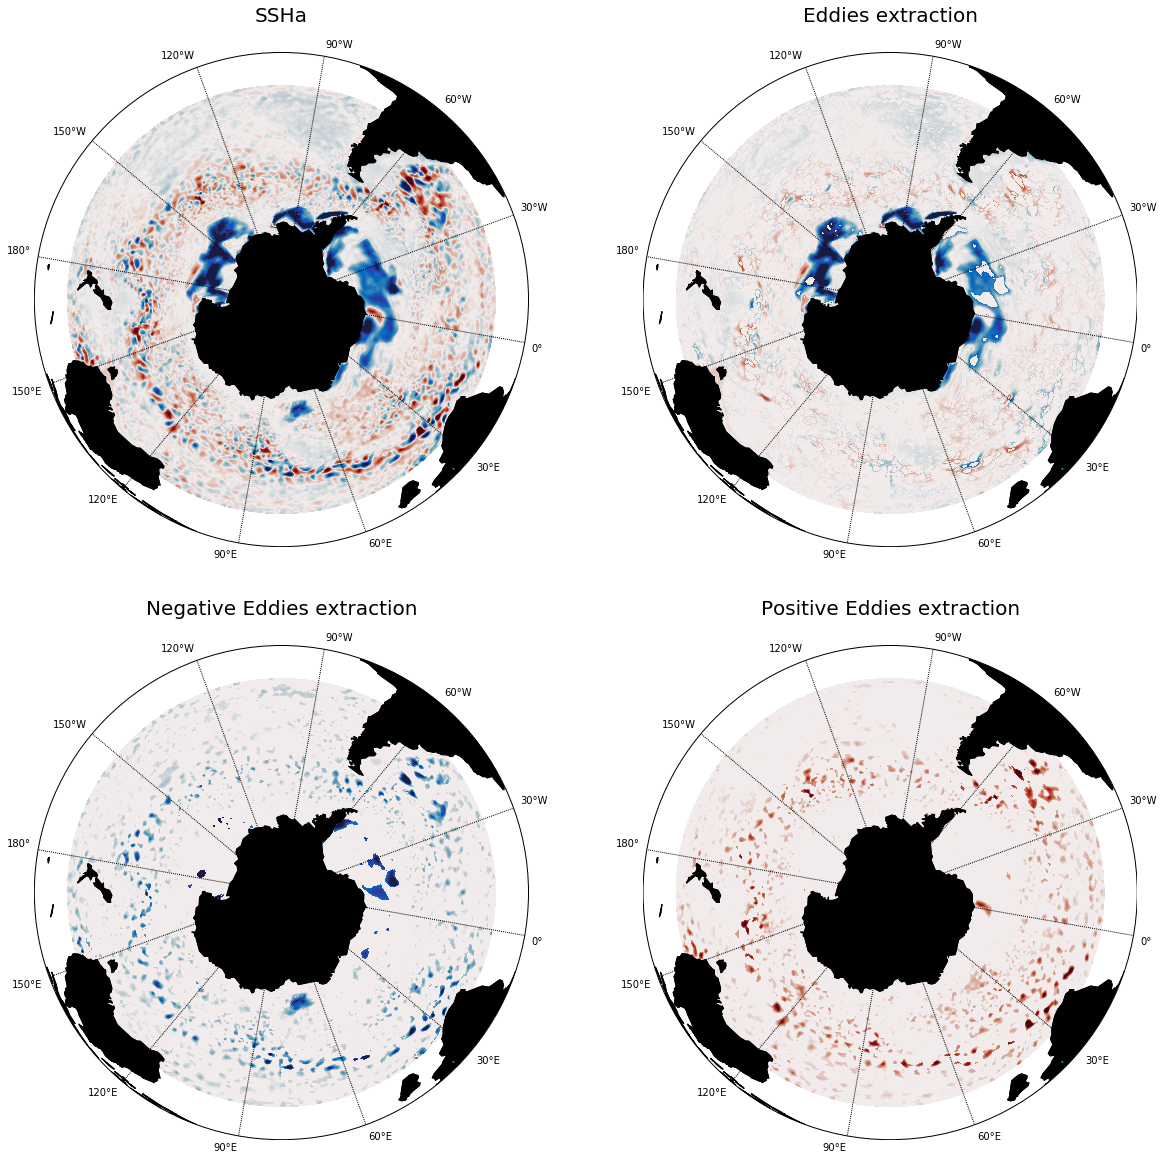

In [ ]:
basemap_mplot(lon,lat,[ssha,ssha-eddysplot-eddysplotn,eddysplotn,eddysplot]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction",\
                       "Positive Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=2,yan=2,figsize=(20,20),fontsize=20);
plt.savefig('../output/eddy_removal_jan.jpg', bbox_inches='tight')

# Extracting eddies in velocity field

In [ ]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import velocity fields values to python environment.

vncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_v.nc')
uncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_u.nc')
u=uncfile.variables['u'][0,0,:,:]
v=vncfile.variables['v'][0,0,:,:]
# Import geographic coordinates (Lon,Lat)
lonu=uncfile.variables['xu_ocean_sub01'][:]
latu=uncfile.variables['yu_ocean_sub01'][:]

In [ ]:
threshold=1
eddysvp=exeddy(eddytd,lat,lon,v,0,threshold,inside=ssha[:-1,:],diagnostics=False)
eddysvn=exeddy(eddytdn,lat,lon,v,0,threshold,inside=ssha[:-1,:],diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******


In [ ]:
threshold=1
eddysup=exeddy(eddytd,lat,lon,u,0,threshold,inside=ssha[:-1,:],diagnostics=False)
eddysun=exeddy(eddytdn,lat,lon,u,0,threshold,inside=ssha[:-1,:],diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******


In [ ]:
eddyu=(eddysun+eddysup)
eddyv=(eddysvn+eddysvp)

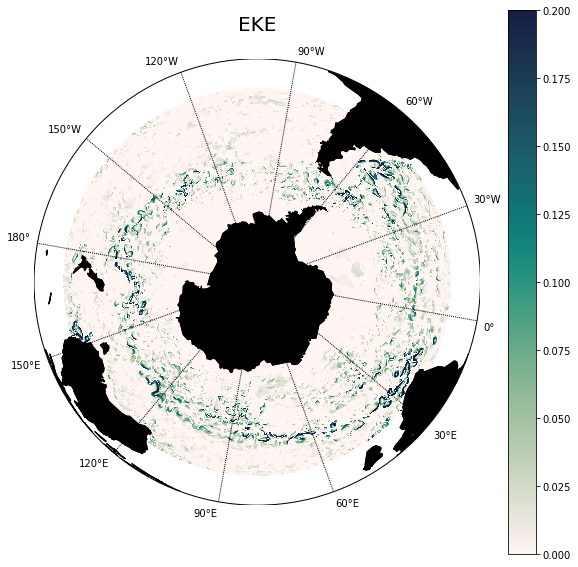

In [ ]:
eke=KE(eddyu,eddyv)

basemap_mplot(lon,lat,eke,title="EKE",scale='Lin',cmap=cm.cm.tempo,\
              vmin=0,vmax=0.2,xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()

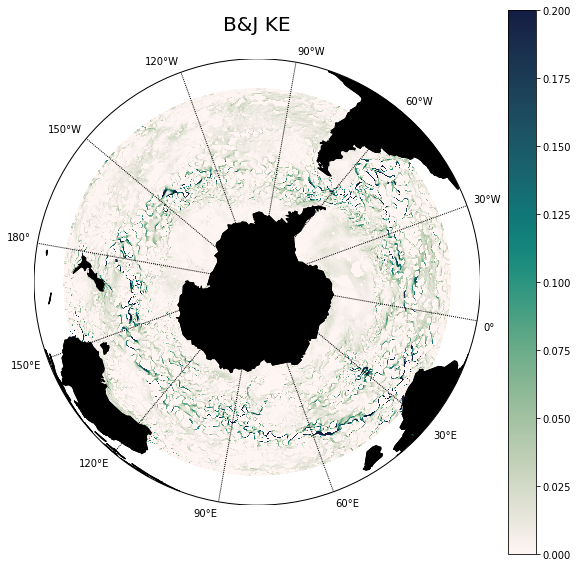

In [ ]:
bjke=KE(u-eddyu,v-eddyv)
basemap_mplot(lon,lat,bjke,title="B&J KE",scale='Lin',cmap=cm.cm.tempo,\
              vmin=0,vmax=0.2,xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()

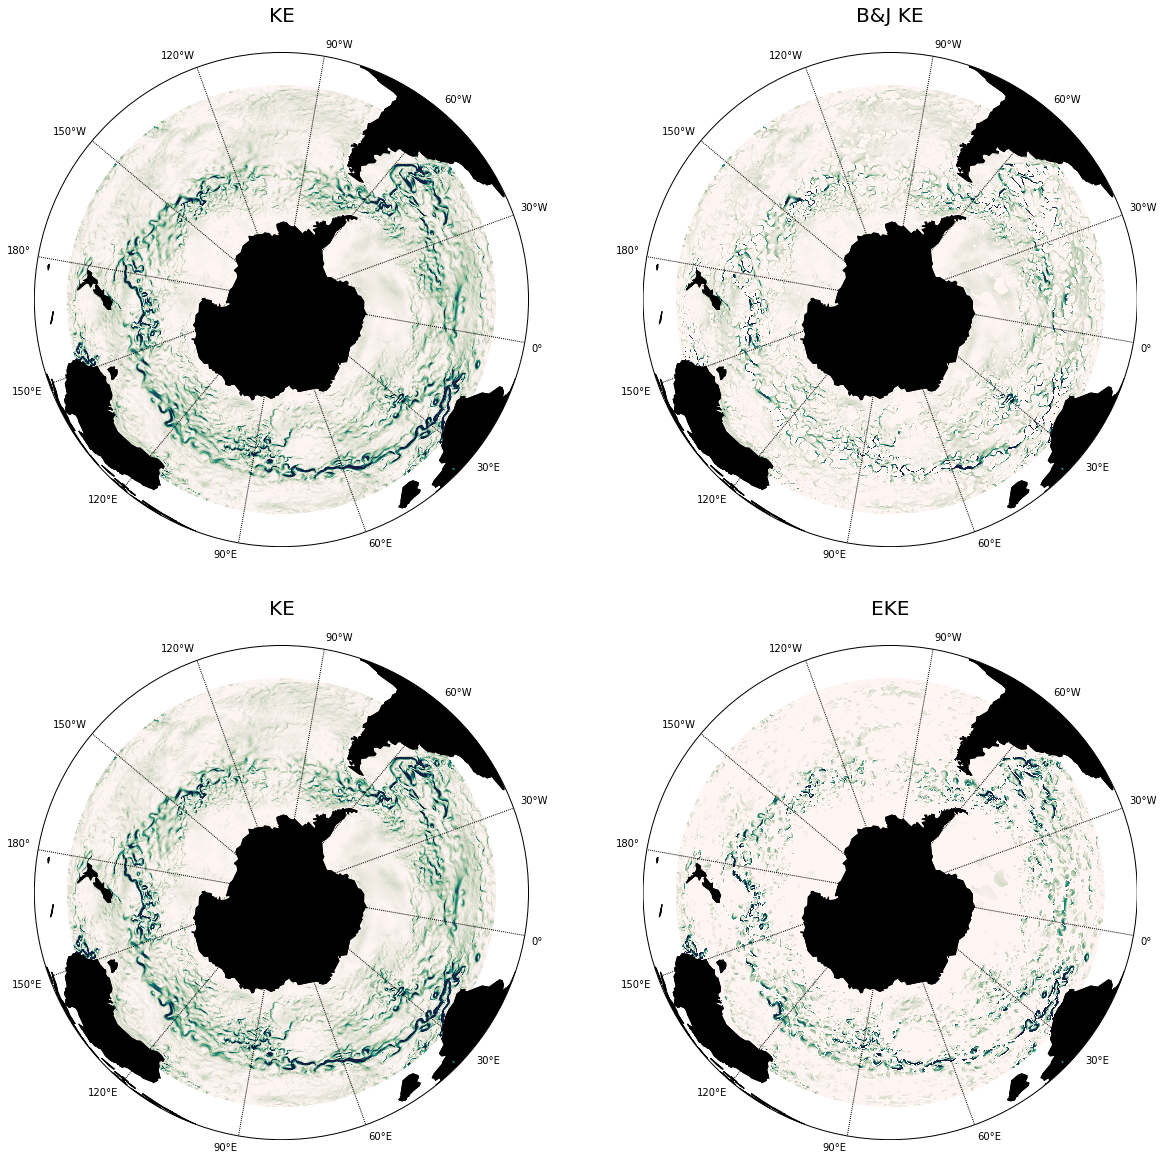

In [ ]:
ke=KE(u,v)
basemap_mplot(lon,lat,[ke,bjke,ke,eke]\
              ,title=["KE","B&J KE","KE","EKE"],scale='Lin',cmap=cm.cm.tempo,\
              vmin=0,vmax=0.2,xan=2,yan=2,figsize=(20,20),fontsize=20);

# Now with the Okubo -Weiss Parameter